# ML model for Price Prediction for Diamonds based on cuts,clarity,and color

### Importing Required Liabraries 

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Importing dataset and reading it with pandas library

In [156]:
df=pd.read_csv('/Users/rohit/Downloads/diamonds.csv')

In [157]:
Diamonds=df

In [158]:
Diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Required Exploratary Data Analysis(EDA) fr the dataset

In [159]:
Diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [160]:
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [161]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [162]:
Diamonds.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [163]:
Diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [164]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### as there are no missing values, we will convert columns with objects into int values.

In [165]:
Diamonds.select_dtypes(include = 'object').head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [166]:
#for 'cut' column
Diamonds.replace('Fair',0,inplace=True)
Diamonds.replace('Good',1,inplace=True)
Diamonds.replace('Very Good',2,inplace=True)
Diamonds.replace('Premium',3,inplace=True)
Diamonds.replace('Ideal',4,inplace=True)

In [167]:
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [168]:
#for 'clarity' column
Diamonds.replace('I1',0,inplace=True)
Diamonds.replace('SI2',1,inplace=True)
Diamonds.replace('SI1',2,inplace=True)
Diamonds.replace('VS2',3,inplace=True)
Diamonds.replace('VS1',4,inplace=True)
Diamonds.replace('VVS2',5,inplace=True)
Diamonds.replace('VVS1',6,inplace=True)
Diamonds.replace('IF',7,inplace=True)

In [169]:
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,E,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,I,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,J,1,63.3,58.0,335,4.34,4.35,2.75


In [170]:
#for 'colour' coulmn
Diamonds.replace('D',0,inplace=True)
Diamonds.replace('E',1,inplace=True)
Diamonds.replace('F',2,inplace=True)
Diamonds.replace('G',3,inplace=True)
Diamonds.replace('H',4,inplace=True)
Diamonds.replace('I',5,inplace=True)
Diamonds.replace('J',6,inplace=True)

In [171]:
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75


#### changing column names to avoid further confusion

In [172]:
Diamonds=Diamonds.rename(columns={'x':'length','y':'width','z':'breadth'})


In [173]:
Diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,breadth
0,1,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


#### Data Visualization

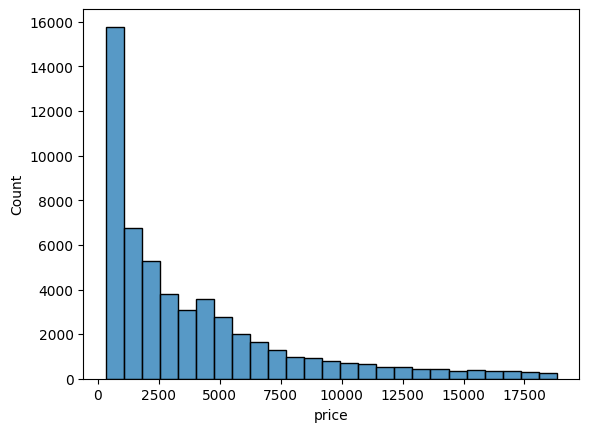

In [174]:
sns.histplot(Diamonds['price'],bins=25)
plt.show()

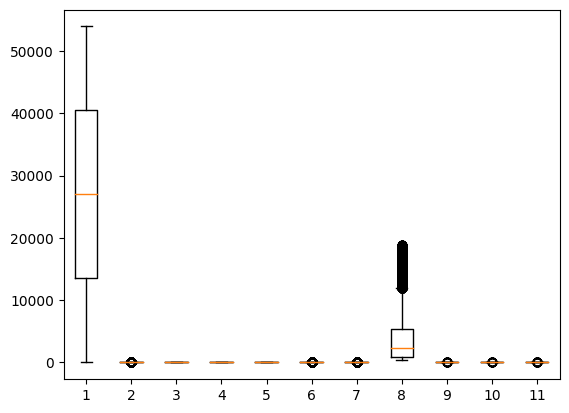

In [175]:
plt.boxplot(Diamonds)
plt.show()

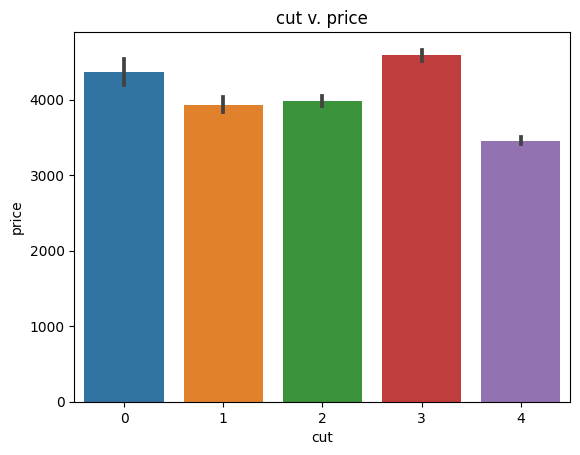

In [176]:
sns.barplot(x='cut',y='price',data=Diamonds)
plt.title('cut v. price')
plt.show()

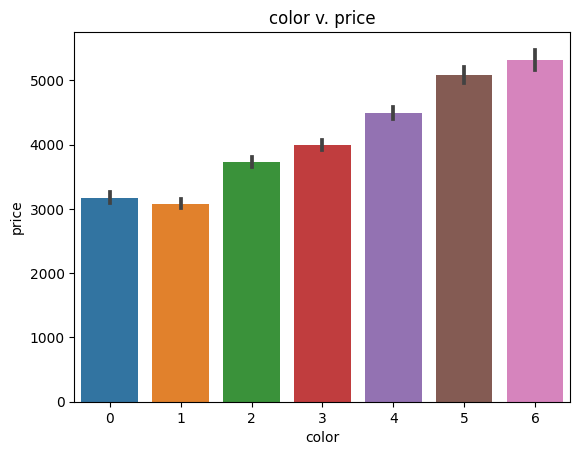

In [177]:
sns.barplot(x='color',y='price',data=Diamonds)
plt.title('color v. price')
plt.show()

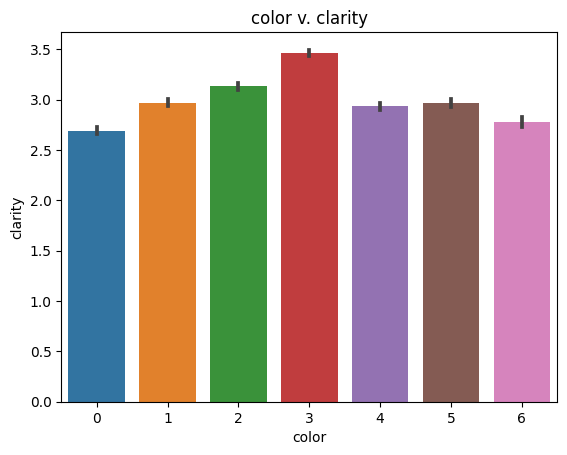

In [178]:
sns.barplot(x='color',y='clarity',data=Diamonds)
plt.title('color v. clarity')
plt.show()

In [179]:
corr_Diamonds=Diamonds.corr()

In [180]:
Diamonds.corr()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,breadth
Unnamed: 0,1.000000,-0.377983,0.096492,-0.095098,0.208598,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,-0.134967,0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.096492,-0.134967,1.000000,-0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.095098,0.291437,-0.020519,1.000000,0.025631,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,0.208598,-0.352841,0.189175,0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,-0.034800,0.028224,-0.218055,0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.433405,0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.053491,0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,-0.405440,0.975094,-0.125565,0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,-0.395843,0.951722,-0.121462,0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006


<Axes: >

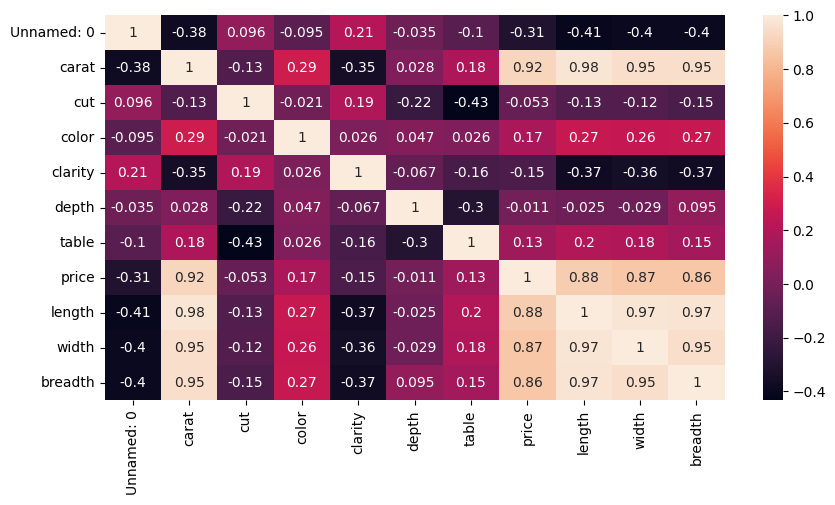

In [181]:
plt.figure(figsize = (10,5))
sns.heatmap(corr_Diamonds,annot = True)

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


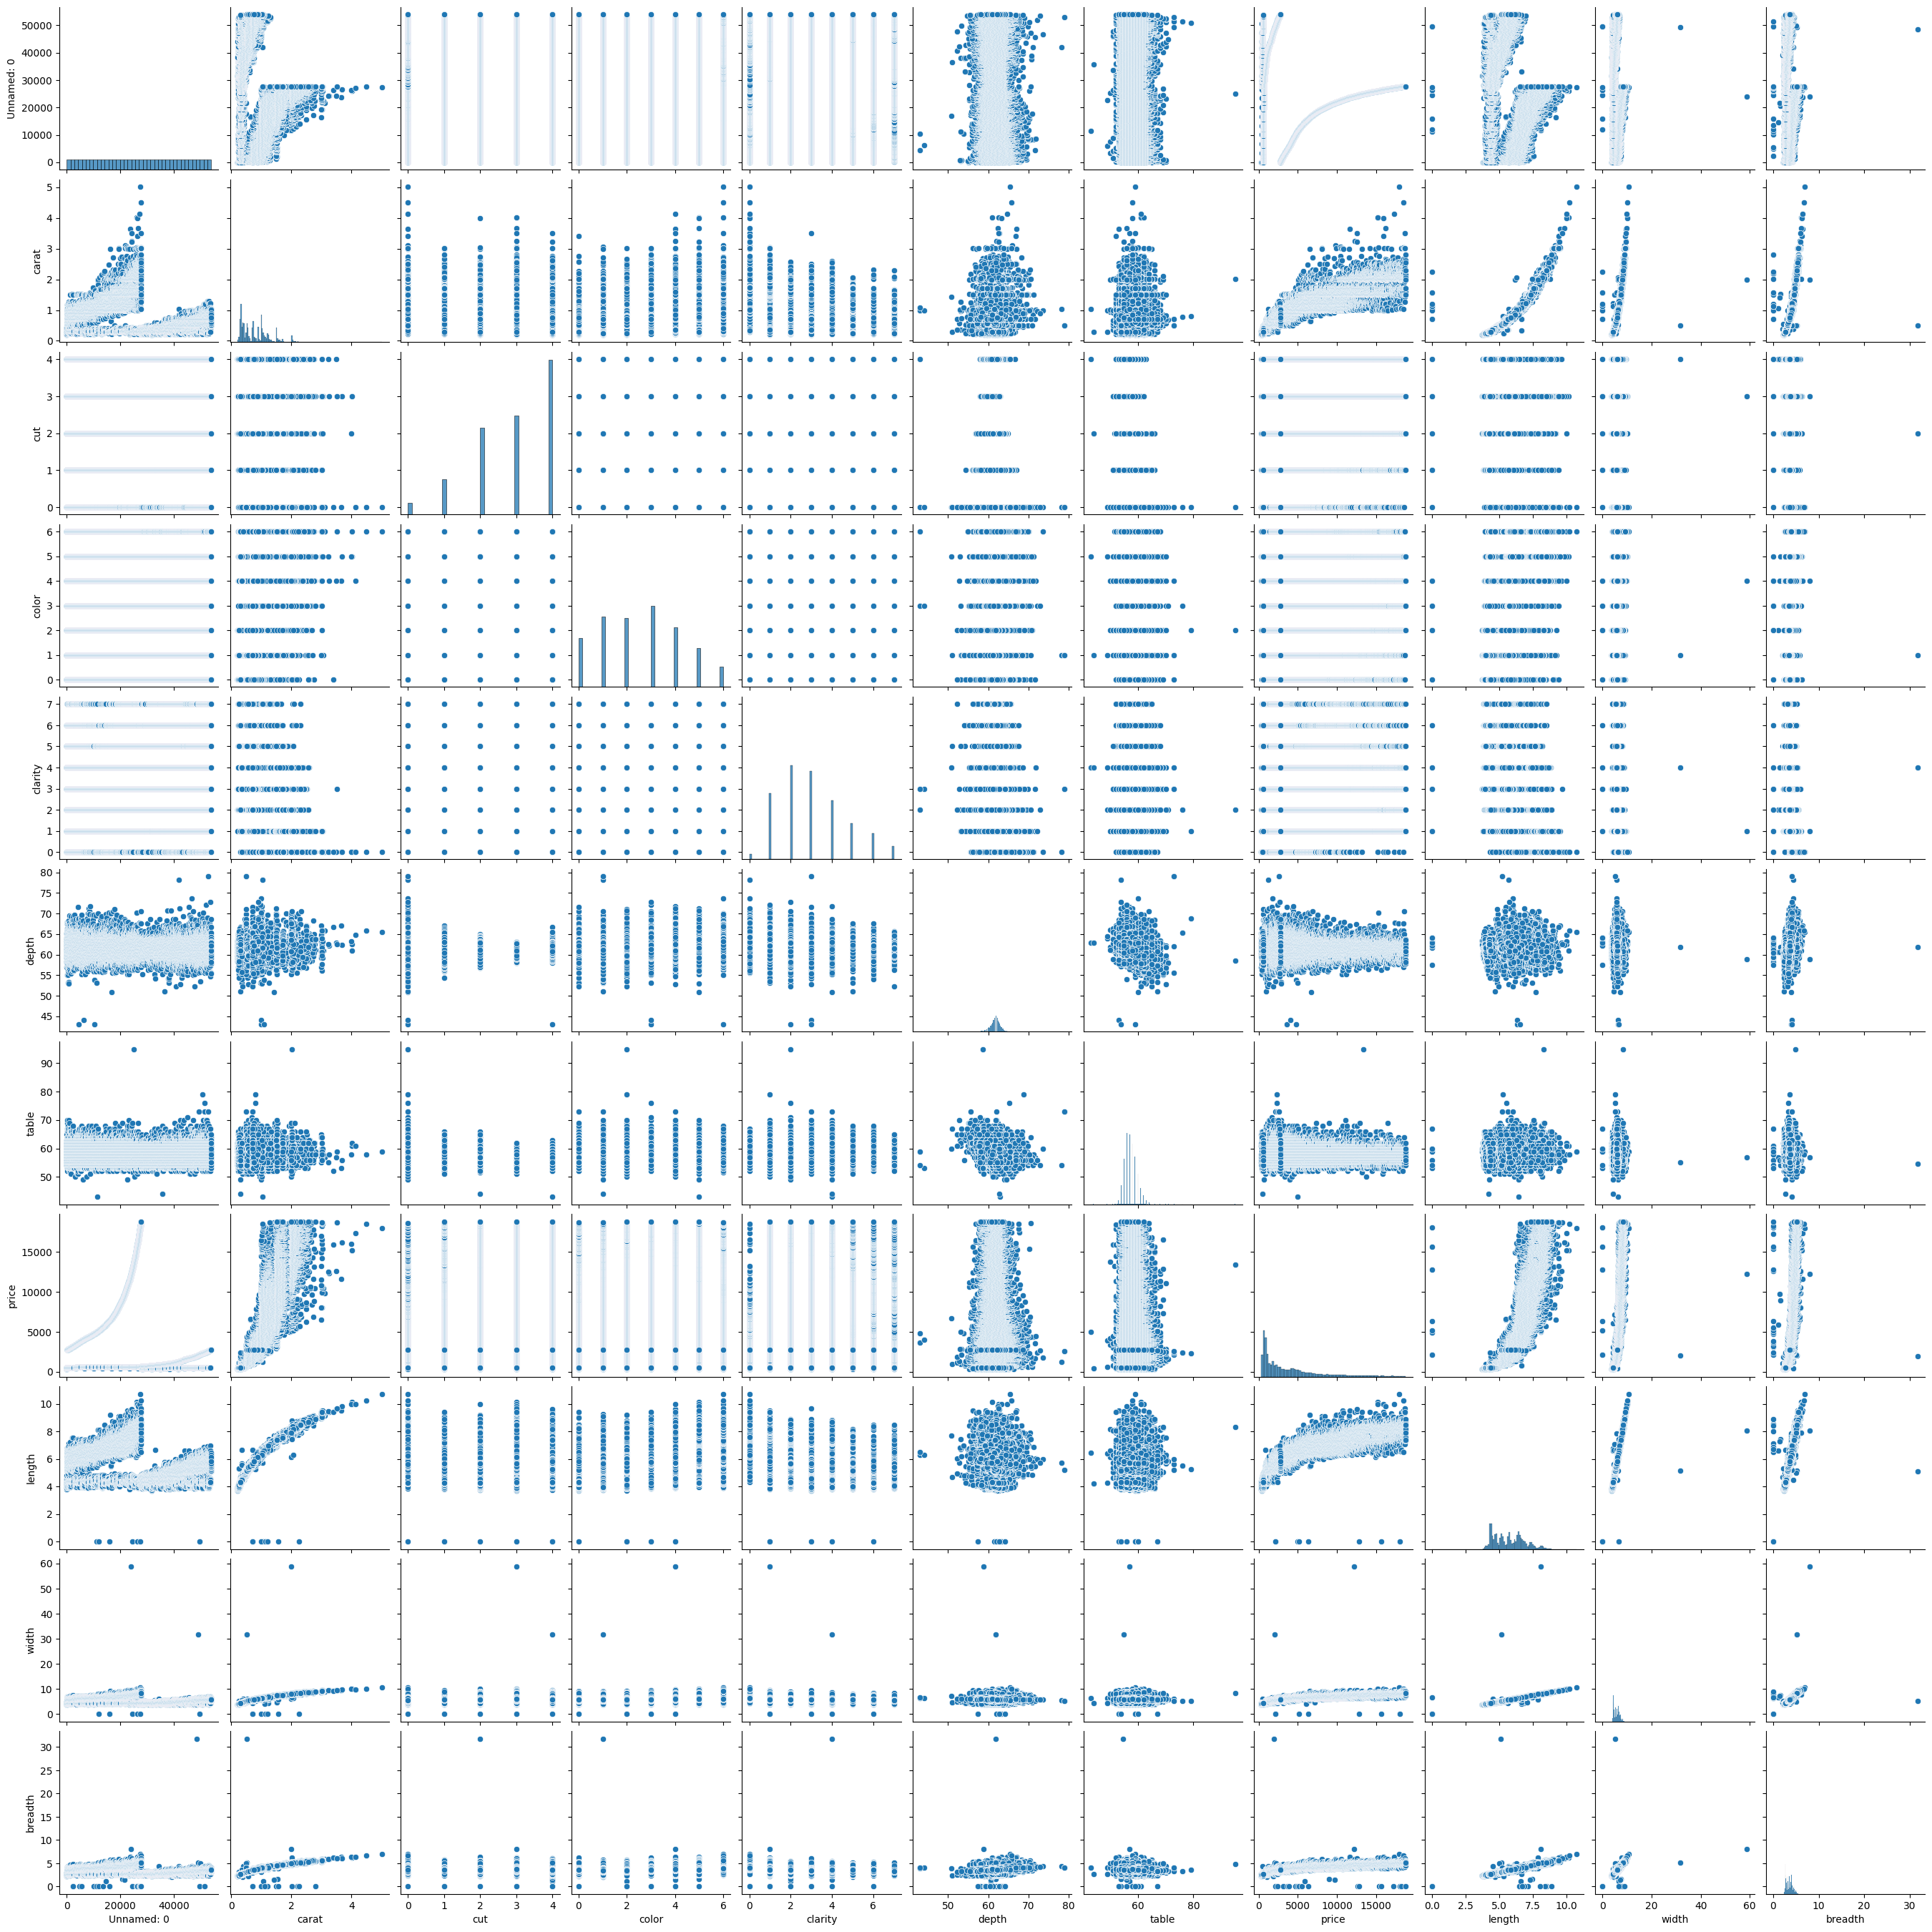

In [182]:
sns.pairplot(Diamonds)
plt.show()

In [183]:
x=Diamonds[['carat','cut','color','clarity','depth' ,'table','length' ,'width' ,'breadth']]

In [184]:
x

,carat,cut,color,clarity,depth,table,length,width,breadth
0,0.23,4,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,6.15,6.12,3.74


In [185]:
y=Diamonds[['price']]

In [186]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


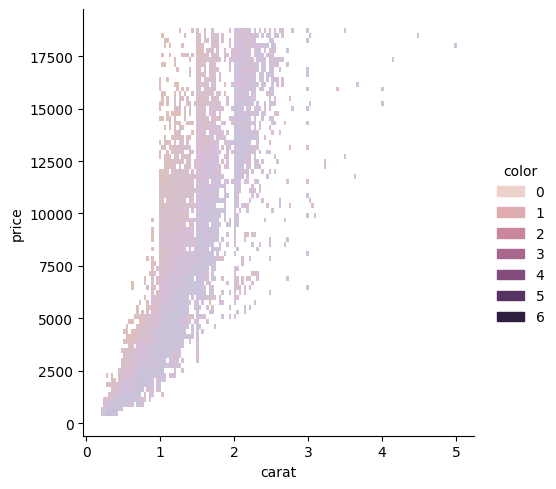

In [187]:
sns.displot(Diamonds, x='carat',y='price', hue='color')
plt.show()

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


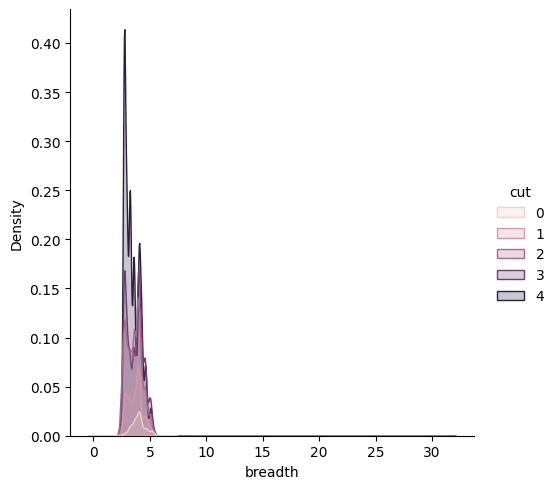

In [188]:
sns.displot(Diamonds, x='breadth', hue='cut',kind="kde", fill="True")
plt.show()

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


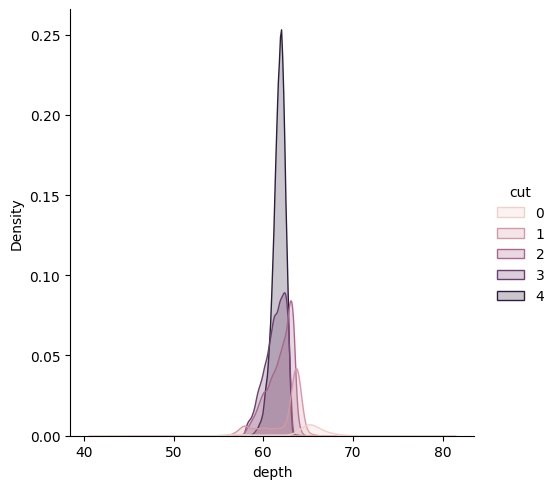

In [189]:
sns.displot(Diamonds, x='depth', hue='cut',kind="kde", fill="True")
plt.show()

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


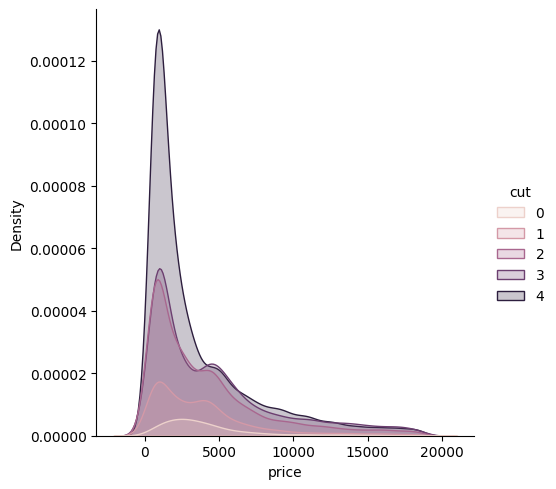

In [190]:
sns.displot(Diamonds, x='price', hue='cut',kind="kde", fill="True")
plt.show()

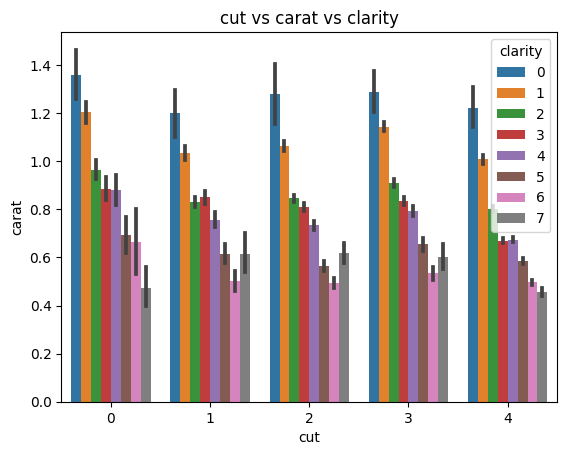

In [191]:
sns.barplot(x="cut", y="carat", hue="clarity", data=Diamonds)
plt.title('cut vs carat vs clarity')
plt.show()

#### Model training

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37758, 9)
(16182, 9)
(37758, 1)
(16182, 1)


#### using StandarScaler for standardizing the data.

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

#### using Linear Regression in order to analyse the value based on another value

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
LR=LinearRegression()

In [198]:
LR.fit(x_train,y_train)

LinearRegression()

In [199]:
y_pred_LR=LR.predict(x_test)
x_test

array([[-0.60695108,  0.08661632, -0.34056955, ..., -0.53584846,
        -0.55853592, -0.57231508],
       [ 2.55879222,  0.9814067 ,  2.01373751, ...,  2.07852865,
         1.90336006,  2.17556134],
       [ 0.59603137,  0.9814067 ,  1.42516075, ...,  0.74903312,
         0.68974937,  0.76565616],
       ...,
       [ 0.04730253, -0.80817406,  1.42516075, ...,  0.19582022,
         0.22164239,  0.30527896],
       [-0.94463037,  0.9814067 ,  0.24800721, ..., -1.05337021,
        -1.00063695, -1.07585264],
       [ 0.44829669,  0.9814067 ,  1.42516075, ...,  0.57057734,
         0.5857256 ,  0.65056186]])

In [200]:
y_test

,price
44751,1619
22963,11011
9078,4521
26148,15454
29451,702
...,...
43227,1397
29877,710
3661,3443
36023,923


In [201]:
y_pred_LR

array([[ 1542.2241223 ],
       [12939.47210093],
       [ 5011.54897864],
       ...,
       [ 4489.86150156],
       [  697.74451409],
       [ 3953.09971628]])

In [202]:
from sklearn.model_selection import cross_val_score

In [203]:
mse=cross_val_score(LR,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [204]:
mse

array([-1404500.62068212, -1344645.92059124, -1579656.71448113,
       -1480412.95029143, -1545467.06327079, -1507242.88268238,
       -1616433.05231912, -1434476.70268492, -1596725.29993275,
       -1397825.03887393])

In [205]:
np.mean(mse)

-1490738.6245809798

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


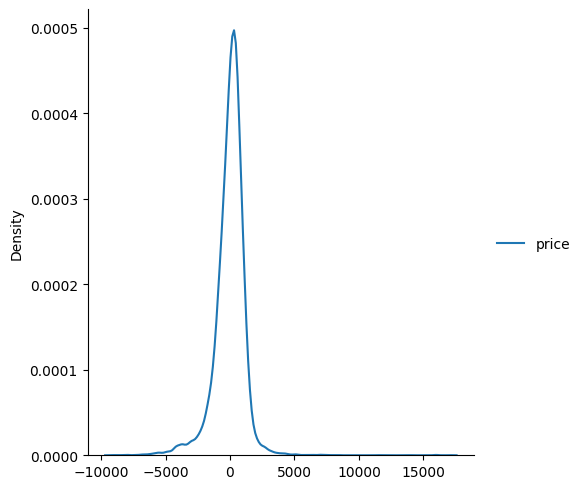

In [206]:
sns.displot(y_pred_LR-y_test,kind='kde')
plt.show()

In [207]:
from sklearn.metrics import mean_squared_error
mse_sk=mean_squared_error(y_pred_LR,y_test)

In [208]:
mse_sk

1470036.4874053365

In [209]:
R_square_sk=LR.score(x_test,y_test)
print('the mean squared error(mse) or J(theta) is: ',mse_sk)
print('R square obtain from scikit learn library is : ',R_square_sk)

the mean squared error(mse) or J(theta) is:  1470036.4874053365
R square obtain from scikit learn library is :  0.9086858235137896


In [210]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [211]:
# assuming y_true and y_pred are the true and predicted values respectively

# calculate RMSE (rootmean squared error)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_LR))

# calculate MSE (mean squared error)
mse=mean_squared_error(y_test,y_pred_LR)

# calculate MAE(mean absolute error)
mae=mean_absolute_error(y_test,y_pred_LR)

# calculate R2 (coefficent of determination)
r2=r2_score(y_test,y_pred_LR)

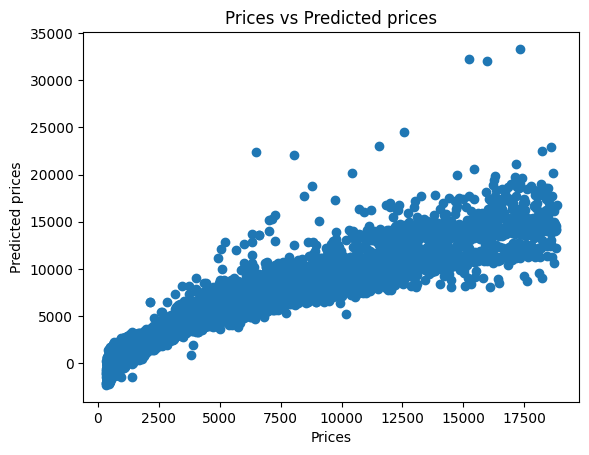

In [212]:
plt.scatter(y_test, y_pred_LR)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

/var/folders/_1/354spcvn48z9gsg6l8rcmdy00000gn/T/ipykernel_82261/3756828398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Value')
/var/folders/_1/354spcvn48z9gsg6l8rcmdy00000gn/T/ipykernel_82261/3756828398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

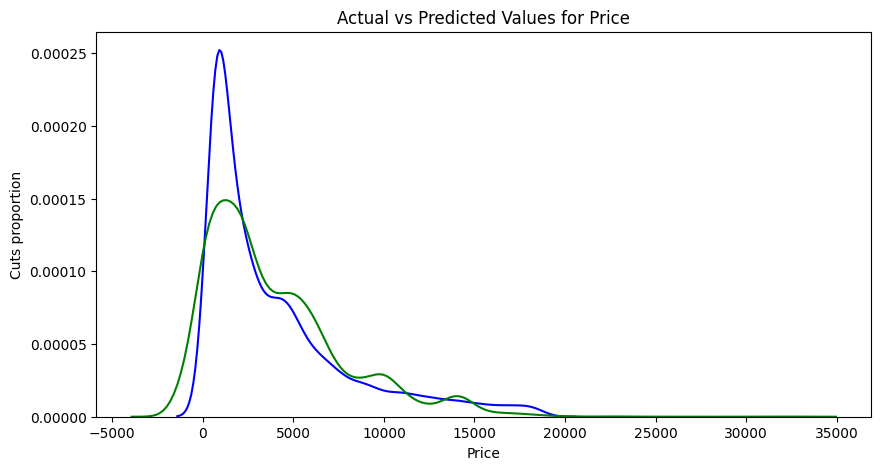

In [214]:
plt.figure(figsize = (10, 5))
ax = sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Value')
sns.distplot(y_pred_LR, hist = False, color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price')
plt.ylabel('Cuts proportion')
plt.show()

In [215]:
rmse

1212.4506123571948

In [216]:
mse

1470036.4874053365

In [217]:
mae

805.2317338037323

In [218]:
r2

0.9086858235137896

#### using Decision tree regressor in order to analyse the value based on another value

In [219]:
from sklearn.tree import DecisionTreeRegressor

In [220]:
DR = DecisionTreeRegressor()

In [221]:
DR.fit(x_train,y_train)

DecisionTreeRegressor()

In [222]:
DR.score(x_test,y_test)

0.9643284045462213

In [223]:
DR.score(x_train,y_train)

0.999997038475465

In [224]:
y_pred_DR = DR.predict(x_test)

In [225]:
y_pred_DR

array([ 1654., 13253.,  4958., ...,  2915.,   726.,  4107.])

In [226]:
# assuming y_true and y_pred are the true and predicted values respectively

# calculate RMSE (rootmean squared error)
rmse_DR=np.sqrt(mean_squared_error(y_test,y_pred_DR))

# calculate MSE (mean squared error)
mse_DR=mean_squared_error(y_test,y_pred_DR)

# calculate MAE(mean absolute error)
mae_DR=mean_absolute_error(y_test,y_pred_DR)

# calculate R2 (coefficent of determination)
r2_DR=r2_score(y_test,y_pred_DR)

In [227]:
rmse_DR

757.8028265850877

In [228]:
mse_DR

574265.1239803486

In [229]:
mae_DR

362.7998084291188

In [230]:
r2_DR

0.9643284045462213

/var/folders/_1/354spcvn48z9gsg6l8rcmdy00000gn/T/ipykernel_82261/2383493536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Value')
/var/folders/_1/354spcvn48z9gsg6l8rcmdy00000gn/T/ipykernel_82261/2383493536.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

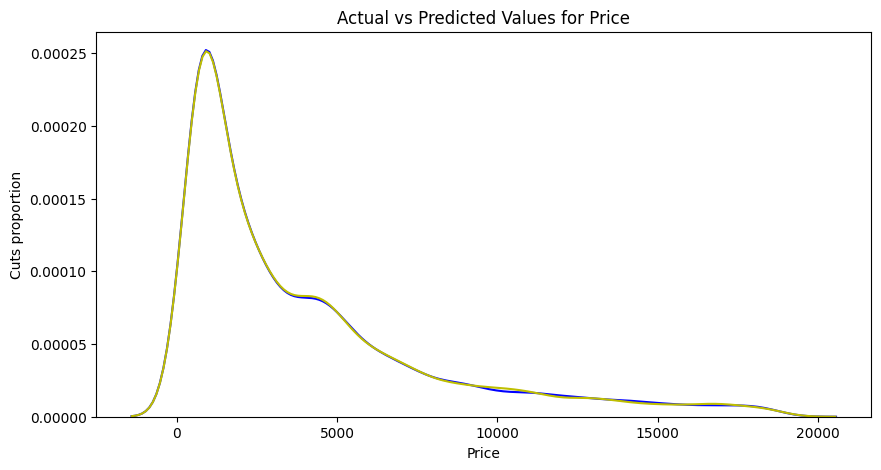

In [231]:
plt.figure(figsize = (10, 5))
ax = sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Value')
sns.distplot(y_pred_DR, hist = False, color = 'y',label = 'Predicted Values',ax = ax)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price')
plt.ylabel('Cuts proportion')
plt.show()

#### using Gradient Boosting Regression for prediction of value based on another value

In [232]:
from sklearn import ensemble

In [233]:
from sklearn.ensemble import GradientBoostingRegressor

In [234]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [235]:
GBR= ensemble.GradientBoostingRegressor(**params)

In [236]:
GBR.fit(x_train,y_train)

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [237]:
GBR.score(x_test,y_test)

0.9781602225528384

In [238]:
GBR.score(x_train,y_train)

0.9788208326362062

In [239]:
y_pred_GBR = GBR.predict(x_test)

In [240]:
y_pred_GBR

array([ 1652.08525093, 11749.19663433,  4765.76991967, ...,
        2911.74626833,   813.33779757,  4039.93393989])

In [241]:
# assuming y_true and y_pred are the true and predicted values respectively

# calculate RMSE (rootmean squared error)
rmse_GBR=np.sqrt(mean_squared_error(y_test,y_pred_GBR))

# calculate MSE (mean squared error)
mse_GBR=mean_squared_error(y_test,y_pred_GBR)

# calculate MAE(mean absolute error)
mae_GBR=mean_absolute_error(y_test,y_pred_GBR)

# calculate R2 (coefficent of determination)
r2_GBR=r2_score(y_test,y_pred_GBR)

In [242]:
rmse_GBR

592.951344351759

In [243]:
mse_GBR

351591.29676855827

In [244]:
mae_GBR

331.58614321097525

In [245]:
r2_GBR

0.9781602225528384

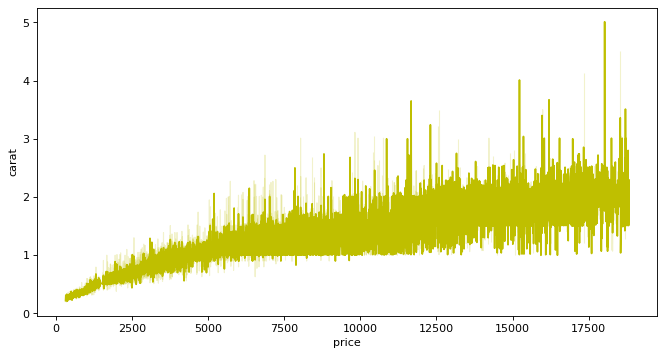

In [246]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='price', y='carat',color='y', data=Diamonds)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


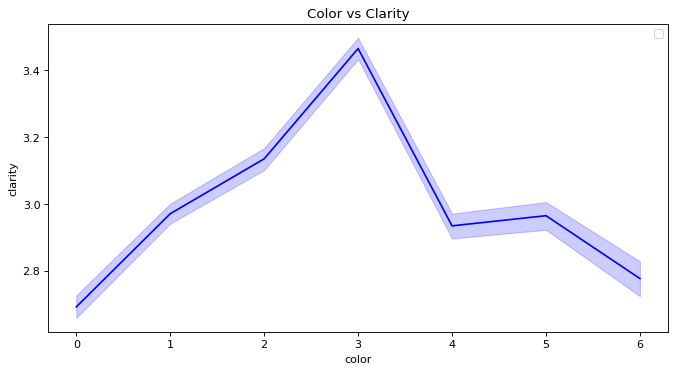

In [247]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='color', y='clarity',color='b', data=Diamonds)
plt.title('Color vs Clarity')
plt.legend()
plt.show()

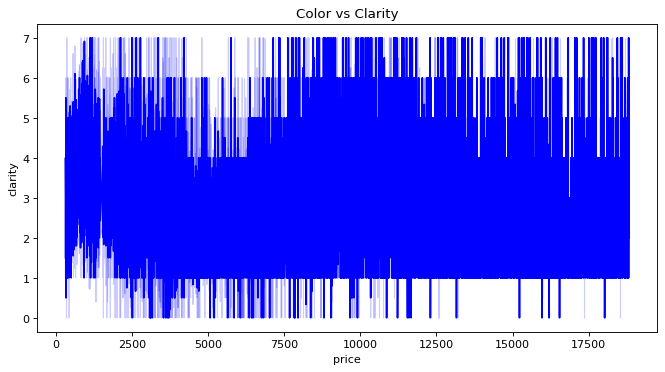

In [248]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='price', y='clarity',color='b', data=Diamonds)
plt.title('Color vs Clarity')
plt.show()

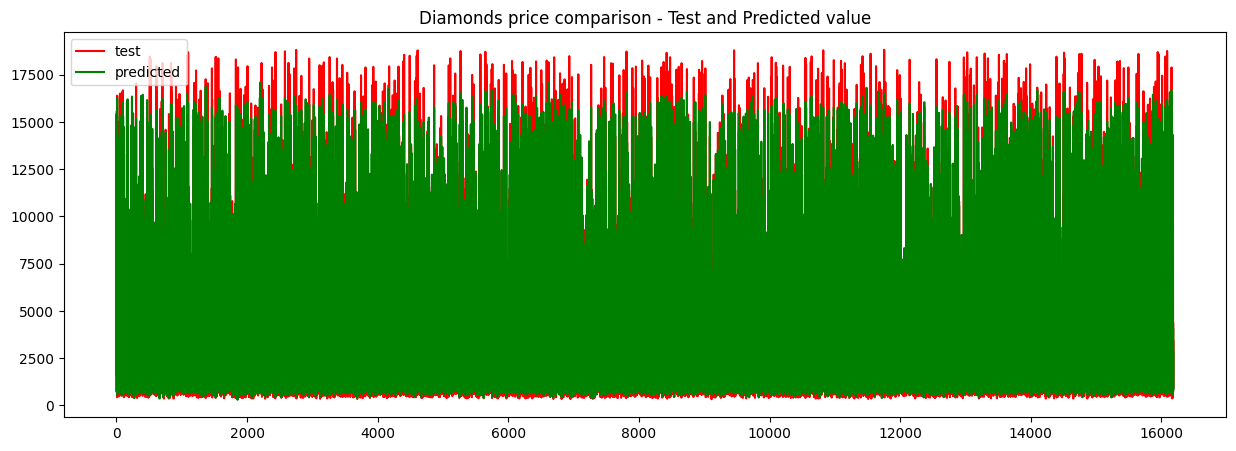

In [249]:
plt.figure(figsize=(15, 5))
GBR_ax = range(len(y_test))
plt.plot(GBR_ax, y_test,color='r', label="test")
plt.plot(GBR_ax, y_pred_GBR,color='g' ,label="predicted")
plt.title('Diamonds price comparison - Test and Predicted value')
plt.legend()
plt.show()

### As a result of comparison of models for price prediction Gradient Boosting Regression gives 97% accuracy for this data